<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : 
### Student Number : 
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [40]:
np.random.seed(11)

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [41]:
df = pd.read_csv('heart_disease.csv')
y = df['target']
X = df.drop('target', axis=1)
y = y.apply(lambda x: -1 if x == 0 else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.head()

835   -1
137    1
534    1
495    1
244    1
Name: target, dtype: int64

### Adaboost Algorithm Implementation (40 points)

In [42]:
from sklearn.tree import DecisionTreeClassifier


def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    error = w[y.values != y_pred]
    return error.sum()


def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    alpha = 1 / 2 * (np.log((1 - error) / error))
    return alpha


def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    diff = (y == y_pred)
    alpha = alpha * np.array([-1 if x == 1 else 1 for x in diff])
    w *= np.exp(alpha)
    return w / w.sum()


class AdaBoost:

    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M=100):

        self.alphas = []
        self.training_errors = []
        self.M = M
        n = X.shape[0]
        w = []
        y_pred = None
        for m in range(0, M):

            # Set weights
            if m == 0:
                w = np.array([1 / n] * n)
            else:
                w = update_weights(w, self.alphas[-1], y, y_pred)
            #TODO

            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            dtc = DecisionTreeClassifier(max_depth=1)
            dtc.fit(X=X, y=y, sample_weight=w)
            self.G_M.append(dtc)
            y_pred = dtc.predict(X)
            #TODO

            # 2. Calculate error of this weak classifier and save it to list of training errors.
            error = calculate_error(y, y_pred, w)
            self.training_errors.append(error)
            #TODO

            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            alpha = calculate_alpha(error)
            self.alphas.append(alpha)
            #TODO

    def predict(self, X, estimator_number=None):
        if estimator_number is None:
            estimator_number = self.M
        weak_preds = pd.DataFrame(index=range(len(X)), columns=range(self.M))

        for m in range(estimator_number):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds[weak_preds.columns[m]] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

              precision    recall  f1-score   support

          -1       0.85      0.80      0.83       102
           1       0.82      0.86      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



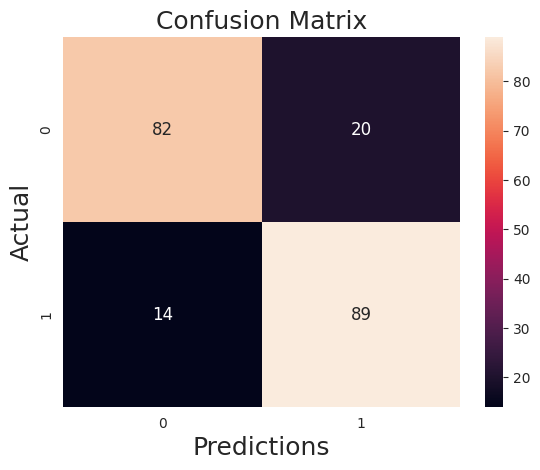

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#TODO : Fit model
adaboost_model = AdaBoost()
adaboost_model.fit(X_train, y_train)

#TODO : Predict on test data
t_pred = adaboost_model.predict(X_test)

#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=t_pred)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 12})
print(classification_report(y_true=y_test, y_pred=t_pred))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

              precision    recall  f1-score   support

          -1       0.87      0.89      0.88       102
           1       0.89      0.86      0.88       103

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



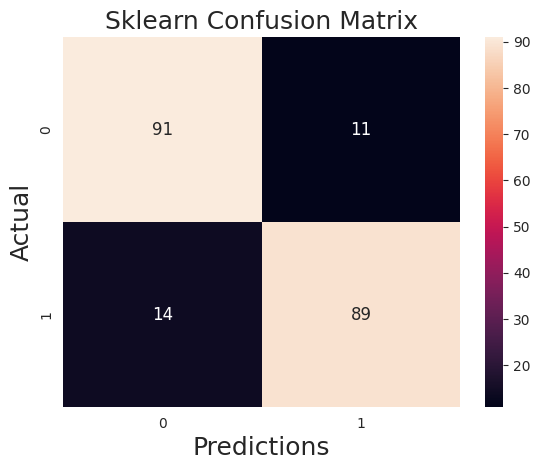

In [44]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
)

ada_classifier.fit(X_train, y_train)
t_pred = ada_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=t_pred)
print(classification_report(y_true=y_test, y_pred=t_pred))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 12})
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Sklearn Confusion Matrix', fontsize=18)
plt.show()

### Early Stopping (15 points)

In [45]:
#TODO : Calculate validation error for different number of estimators
errors = []
for en in range(1, 100):
    y_pred = adaboost_model.predict(X_test, en)
    errors.append(len([t for t in (np.array(y_pred) == np.array(y_test)) if t == 0]) / len(y_pred))


<AxesSubplot: >

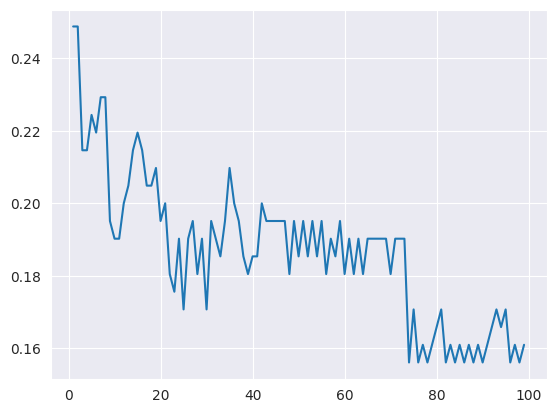

In [46]:
#TODO : Plot validation error versus number of estimators figure.
sns.lineplot(x=list(range(1, 100)), y=errors)

In [47]:
#TODO : Print the best number for estimators and minimum value for validation error.
print(np.argmin(errors), errors[np.argmin(errors)])

73 0.15609756097560976


### Weighted Error (10 points)

<AxesSubplot: >

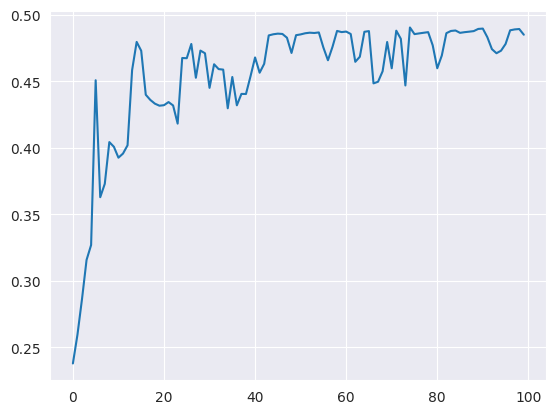

In [48]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
sns.lineplot(y=adaboost_model.training_errors, x=list(range(0, 100)))

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)



In Adaboost, the weighted error is a measure of the accuracy of the classifier on the current training set. As the number of estimators increases, the classifier becomes more complex and is able to fit the training data more closely. This can lead to a decrease in the weighted error on the training set, but it can also lead to an increase in the weighted error on unseen data, due to overfitting.